# Mathematical Underpinnings - Lab 1

## Task 1
### a) Generative approach 

We know $\pi = P(Y=1)$ and the distributions $f(x|Y=1)$ and $f(x|Y=-1)$.

#### First bullet point

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [13]:
# sampling from multivariate normal distribution and from Bernoulli

x = np.random.multivariate_normal(np.array([0,0]), np.eye(2), 5)
y = np.random.binomial(1, 0.5, 5)
x, y

(array([[-0.48547037, -1.97638938],
        [ 0.88964835,  0.0360697 ],
        [-2.14121761,  0.5077447 ],
        [ 0.05806228,  1.29549116],
        [-1.47261408,  0.46088752]]),
 array([0, 0, 0, 1, 0]))

In [14]:
m1 = np.array([1,1])
m2 = np.array([0,0])

sigma = np.array([[1, -0.5],[-0.5, 1]])

In [15]:
n = 1000
Y_generative = np.random.binomial(1,1/2,n)
# add one to the mean when Y=1 to get gaussian mixture with m1,m2 and sigma.
X_generative = np.random.multivariate_normal(m2, sigma, n) + np.vstack((Y_generative*(m1-m2)[0], Y_generative*(m1-m2)[1])).transpose()

Does the distribution of $P(Y=1|X=x)=p(y=1|x)$ correspond to a logistic model?

A hint: Use Bayes theorem to compute $p(y=1|x)$. Is it possible to represent $p(y=1|x)$ as $\frac{e^{\beta_0 + \beta x}}{1 + e^{\beta_0 + \beta x}}$?


#### Second bullet point

Find the formulas for the parameters of the logistic model (the coefficients and the intercept).

A hint: Use the representation of $p(y=1|x)$ from the first bullet point and solve for $\beta_0$ and $\beta$.

In [4]:
# computing beta_0 and beta using the formulas


In [16]:
# a logistic model
mod_a = LogisticRegression(penalty=None)
mod_a.fit(X_generative, Y_generative)
(mod_a.intercept_, mod_a.coef_)

(array([-2.23881412]), array([[2.12685626, 2.01747014]]))

### b) Discriminative approach

We know $f(x)$ and $P(Y=1|X=x)$.

#### First bullet point

In [17]:
# sampling
Y_temp = np.random.binomial(1,1/2,n)
X_discriminative = np.random.multivariate_normal([0,0], sigma, n) + np.vstack((Y_temp*(m1-m2)[0], Y_temp*(m1-m2)[1])).transpose()

p = 1/(1+np.exp(2 - X_discriminative @ np.array([2,2])))
Y_discriminative = np.random.binomial(1,p.reshape(-1))

In [18]:
mod_b = LogisticRegression(penalty=None)
mod_b.fit(X_discriminative, Y_discriminative)
(mod_b.intercept_, mod_b.coef_)

(array([-2.00096265]), array([[2.10229408, 2.15213859]]))

#### Second bullet point

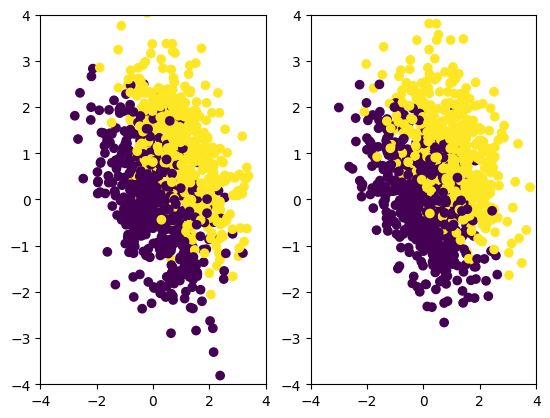

In [19]:
plt.subplot(1, 2, 1)
plt.scatter(X_generative[:,0], X_generative[:,1], c=Y_generative)
plt.ylim(-4,4)
plt.xlim(-4,4)
plt.subplot(1, 2, 2)
plt.scatter(X_discriminative[:,0], X_discriminative[:,1] , c=Y_discriminative)
plt.ylim(-4,4)
plt.xlim(-4,4)
plt.show()

What distinguishes the generative approach from the discriminative approach?

### Nothing

### c)

To sample from $f_{X|Y=-1}$, first, we will give an answer to Q1.

Q1. A hint: use Bayes theorem for $p(x|y=-1)$ and use law of total probability for $p(x)$.

In [ ]:
# X | Y = -1 ~ Exp(beta_1 + 1)

In [55]:
n1 = 1000
n2 = 2000
Y = np.hstack((np.ones(n1), np.zeros(n2)))
X = np.hstack((np.random.exponential(1,n1), np.random.exponential(1/(beta_1 + 1),n2))).reshape(-1,1)

In [56]:
# a model
mod = LogisticRegression(penalty=None)
mod.fit(X, Y)
(mod.intercept_, mod.coef_)

(array([-2.10035208]), array([[3.01573197]]))

Q2, Q3. A hint: what is the distribution of $f_{X|Y=-1}$? What ia a norming constant?

...

In [59]:
# Q2
# pi / (1 - pi) * exp(-beta_0) = beta_1 + 1
# Once pi and beta_1 are set, beta_0 is unique

In [ ]:
# Q3
# no, same argument as before

If that is doable, given $\beta_1$ and $\pi$ compute $\beta_0$.

A hint: Of course it is, compute $\beta_0$.

In [57]:
beta_1 = 1
pi_c = n1/(n1 + n2)
# pi / (1 - pi) * exp(-beta_0) = beta_1 + 1
beta_0 = - np.log((beta_1 + 1) / pi_c * (1 - pi_c))

In [58]:
beta_0

-1.3862943611198906

## Task 2

### a)

$R(a,a^*) = \mathbb{E} \mathcal{L}(f(X), Y) = \mathbb{E}(aX - Y)^2 = ...$,

In our task we know $a^* = 1$.

In [268]:
# def population_risk(a, sigma_eps):
#     return ...

### b)

In [269]:
# sampling

Empirical risk: $\frac{1}{n} \sum_{i=1}^n (ax_i - y_i)^2$

In [270]:
# def empirical_risk(a, x, y):
#     return ...

### c)

In [37]:
# code, plot

### d)

Excess risk: $$E(\hat a, a^*) =R(\hat a, a^*) - \textrm{inf}_{a \in A_0} R(a, a^*)$$

In [38]:
# excess risk
# ...

In [39]:
# simulations with fixed sample size

In [276]:
# simulations for various sample sizes

In [40]:
# a nice plot visualising the results (how the unconditional excess risk changes with a sample size)